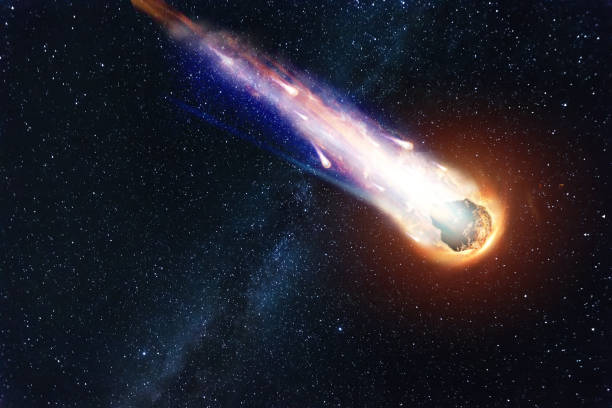

#  Downloading Required Files:

#To run this notebook you need to download the csv file 
[Click here and you can find xml to download](https://catalog.data.gov/dataset/meteorite-landings/resource/57f7fc06-0a5c-4261-9ffa-6f95ea9834eb) if you are unable to download do not worry send an email to mj35132@umbc.edu.

#Their are some cells that are marked down due to space constraint not exceeding 1000kb(1mb)

#  Introduction

The Meteoritical Society collects data on meteorites that have fallen to Earth from outer space. This dataset includes the location, mass, composition, and fall year for over 45,717 meteorites that have struck our planet.

This dataset was downloaded from NASA’s Data Portal, and is based on The Meteoritical Society's Meteoritical Bulletin Database 

# Notes on missing or incorrect data points:

Some of these entries include dates that were parsed into the NASA database improperly. As a quick check, any year prior to 860 CE or thereafter to 2023 is incorrect; these should instead be BCE years. Other mistakes might exist, and we're trying to figure out how to spot them.There are a few entries with a latitude and longitude of 0N/0E (off the western coast of Africa, where recovering meteorites would be quite challenging). The precise coordinates of many of these discoveries in Antarctica were not provided. Locations at 0N/0E should probably be regarded as NA.


# The Data:

Note that a few column names start with "rec" (e.g., recclass, reclat, reclon). These are the recommended values of these variables, according to The Meteoritical Society. In some cases, there were historical reclassification of a meteorite, or small changes in the data on where it was recovered; this dataset gives the currently recommended values.

# The dataset contains the following variables:

name: the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
id: a unique identifier for the meteorite

nametype: one of: -- valid: a typical meteorite -- relict: a meteorite that has been highly degraded by weather on Earth

recclass: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)

mass: the mass of the meteorite, in grams

fall: whether the meteorite was seen falling, or was discovered after its impact; one of: -- Fell: the meteorite's fall was observed -- Found: the meteorite's fall was not observed

year: the year the meteorite fell, or the year it was found (depending on the value of fell)

reclat: the latitude of the meteorite's landing

reclong: the longitude of the meteorite's landing

GeoLocation: a parentheses-enclose, comma-separated tuple that combines reclat and reclong

In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
mf=pd.read_csv('Meteorite_Landings.csv')

#importing the pandas and reading the csv file

# Describing the data set

In [ ]:
mf.head()
# Giving a glance what the data is about

In [ ]:
mf = mf.rename(columns={'mass (g)': 'mass'})
mf['mass']=mf['mass']/1000 # 1kg=1000grms
#renaming the cloumn mass(g) to mass converting te mass in grams to kgs 
mf['mass'].describe()
# To get a glance about how the mass distribution looks for data cleaning

In [ ]:
mf['year'].value_counts()
# Just to know in which years does meteorite hunter found or meteorite hit the earth most.

In [ ]:
mf['recclass'].value_counts()
#just to know how what are the most and leat found materials in meteorite

In [ ]:
mf['recclass'].describe(include='object')

# Describing the type of objects and count and uniqueness

# Classifing and cleaning data for better results

# CLASSIFY THE TYPES FOR A CLEANER IMAGE AND REVIEW

* **CC**: Carbonaceous Chondrite
* **OC**: Ordinary Chondrite
* **M**: Martian
* **AA**: Asteroidal Achondrites
* **PA**: Primitive Achondrites
* **L**: Lunar
* **EC**: Enstatite Chondrite
* **AOC**: Other Chondrite Groups(not in one of the major classes)
* **P**: Pallasites
* **MG**: Mesosiderite Group
* **MIM**: Magmatic Iron Meteorite Groups
* **NMIM**: Non-magmatic or Primitive Iron Meteorite Groups
* **UN**: Not Enough Information (Ungrouped or Unknown)


CHECK:

https://en.wikipedia.org/wiki/Meteorite_classification

In [ ]:
mf.recclass.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim'],value='PA',inplace=True)

mf.recclass.replace(to_replace=['Angrite', 'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite'],value='AA',inplace=True)

mf.recclass.replace(to_replace=['Lunar', 'Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)'],value='L',inplace=True)

mf.recclass.replace(to_replace=['Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)','Martian (basaltic breccia)'],value='M',inplace=True)

mf.recclass.replace(to_replace=['C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung',
           'CB', 'CBa', 'CBb', 'CH/CBb', 'CH3', 'CH3 ', 'CI1', 'CK', 'CK3',
           'CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an','CR7'],value='CC',inplace=True)

mf.recclass.replace(to_replace=['OC', 'OC3','H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6','L', 'L(?)3',
           'L(H)3', 'L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'L3', 'L3-4', 'L3-5',
           'L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7', 'LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6',
           'L~3', 'L~4', 'L~5', 'L~6','Relict H','Relict OC','LL-melt breccia','H-melt breccia',
                                 'L5-melt breccia','LL-imp melt','H3.05','LL6-melt breccia',
                                 'LL3.05','H4-melt breccia','LL3.8-4','L3.00','L~4-6','LL6-an',
                                 'L4-melt breccia','LL(L)3.1','L3-melt breccia','H3.15'],value='OC',inplace=True)

mf.recclass.replace(to_replace=['EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6','EL-melt rock'],value='EC',inplace=True)

mf.recclass.replace(to_replace=['K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6','R3.5-4'],value='AOC',inplace=True)

mf.recclass.replace(to_replace=['Pallasite', 'Pallasite, PES','Pallasite, PMG',
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?'],value='P',inplace=True)

mf.recclass.replace(to_replace=['Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?'],value='MG',inplace=True)

mf.recclass.replace(to_replace=['Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB'],value='MIM',inplace=True)

mf.recclass.replace(to_replace=['Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?'],value='NMIM',inplace=True)

mf.recclass.replace(to_replace=['Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an','Howardite-an','C3.0-ung','Iron, IAB-sHL-an'],value='UN',inplace=True)


In [ ]:
mf['recclass'].value_counts()
# count of recclass after classifing.

In [ ]:
print(mf.shape)
print(mf.info())
# showing the numer of rows and columns
# Printing the info of each column with data types

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(mf,figsize=(15,5))

# this was directly taken from jhon sir's notebook to show and get an idea about what type of dta we are dealing.

In [ ]:
msno.bar(mf,figsize=(15,5))
plt.show()

In [ ]:
print("MASS MEAN:\n")
print(mf.groupby(["recclass"])["mass"].mean())

In [ ]:
mf['mass'] = mf.groupby('recclass')['mass'].apply(lambda x: x.fillna(x.mean()))
print(mf.groupby(["recclass"])["mass"].mean())

In [ ]:
msno.bar(mf,figsize=(15,5))
plt.show()

# Disclamer
* I CHOOSE A RANDOM POINT IN THE PACIFIC OCEAN WITHOUT DETECTING DATA AND LET'S ADJUST ALL UNKNOWN COORDINATES ACCORDING TO THERE.

In [ ]:
mf["reclat"].fillna(-54.572062,inplace=True)
mf["reclong"].fillna(11.675271,inplace=True)

In [ ]:
mf.shape

In [ ]:
mf= mf.loc[(mf['year']>=860.0) & (mf['year']<=2023.0)]

# This is the final dataset that we are gonna work on.
# if their are no longitude and latitude we cannnot work on data
# we cannot just the mas as mean or median or mode because mass is varing form 2grams to 2lakh grams
# years is the main column we should look because meteorite were first found in 1959 and the present year is 2023 so before that and after that is fake data.

# Some Basic Insights into the data set which are from project 1
*if not required for your understanding u can directly go to hypothesis.

In [ ]:
mf_fell_new=mf

mf_fell_new.to_csv('meteoritenew.csv',index=False)
#This for myske to look how dta looks now.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing all the libraies for ploting.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 50))
sns.histplot(mf_fell_new['year'], kde=False)
plt.xlim(860,2024)
plt.show()
# Showing the year wise meteoritr fell and found

In [ ]:
meteorite_count_by_type = mf['recclass'].value_counts()

# Create a bar plot
meteorite_count_by_type.plot(kind='bar', figsize=(12,8))

# Set labels and title
plt.xlabel('Meteorite Type')
plt.ylabel('Count')
plt.title('Count of Meteorites by Type')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(data=mf_fell_new, x="year", y="mass",hue="recclass")
plt.title("Relationship between Year and Mass of Meteorites")
plt.xlabel("Year")
plt.xlim(860,2023)
plt.ylabel("Mass (kg)")
plt.show()
#Data range and spread: Scatter plots can also give an idea about the range and spread of the data. If the points are clustered close together, this suggests that the values of the variables are tightly packed around the mean.
#When all the points in a scatter plot are in the same line parallel to the x-axis, it means that there is no relationship or correlation between the two variables being plotted. This is also called a flat or horizontal scatter plot.

In [ ]:
fall_vs_find =mf_fell_new['fall'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(fall_vs_find.index, fall_vs_find.values)
plt.title('Distribution of Meteorite Falls versus Finds')
plt.xlabel('Type')
plt.ylabel('Number of Meteorites')
plt.show()

substance_counts =mf_fell_new['recclass'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation=90)
plt.bar(substance_counts.index, substance_counts.values,width=0.5)
plt.title('Distribution of Meteorite Substances')
plt.xlabel('Substance')
plt.ylabel('Number of Meteorites')
plt.show()

In [ ]:

# Calculating the number of "fell" and "found" meteorites by year
fell_found_year_counts = mf_fell_new.groupby(['year', 'fall']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10, 10))
# Createing a bar chart
plt.bar(fell_found_year_counts['year'], fell_found_year_counts['counts'], color=['blue', 'green'])
plt.title('Distribution of Meteorites by Year and "Found" vs "Fell"')
plt.xlabel('Year')
plt.xlim(1950,2023)
plt.ylabel('Number of Meteorites')
plt.legend(['Fell','Found'])
plt.show()


In [ ]:
colors = {'Fell':'blue', 'Found':'green'}
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(mf_fell_new['reclat'], mf_fell_new['reclong'],c=[colors[i] for i in mf_fell_new['fall']])
plt.title('Locations of Meteorites by "Found" vs "Fell"')
plt.xlabel('reclong')
plt.ylabel('reclat')
plt.show()


In [ ]:
!pip install folium

In [ ]:

import geopandas as gpd

gdf = gpd.GeoDataFrame(mf_fell_new, geometry=gpd.points_from_xy(mf_fell_new.reclat, mf_fell_new.reclong))

# Using Seaborn color_palette function to generate a list of colors
colors = sns.color_palette("hls", len(mf_fell_new['recclass'].unique()))

# Createing a dictionary that maps each material to a color
color_dict = {material: color for material, color in zip(mf_fell_new['recclass'].unique(), colors)}

# Adding a column to the GeoDataFrame with the color for each material
gdf['color'] = gdf['recclass'].map(color_dict)

# Ploting the GeoDataFrame on a map, with each point colored by material
ax = gdf.plot(column='color', figsize=(10, 10))

plt.show()


import folium

# Createing a map object
my_map = folium.Map()

# Add markers to the map object
for index, row in mf_fell_new.iterrows():
    folium.Marker(location=[row['reclat'], row['reclong']]).add_to(my_map)

# Displaying the map object
my_map

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(mf_fell_new['year'], mf_fell_new['mass'])
plt.title('Mass of Meteorites by Year')
plt.xlabel('Year')
plt.ylabel('Mass')
plt.show()

# Calculate the correlation coefficient
correlation = mf_fell_new['year'].corr(mf_fell_new['mass'])
print("Correlation coefficient:", correlation)

In [ ]:
falls_per_year = mf_fell_new[mf_fell_new['fall'] == 'Fell'].groupby('year').size()
finds_per_year = mf_fell_new[mf_fell_new['fall'] == 'Found'].groupby('year').size()

# Plot the number of falls and finds per year using a line plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(falls_per_year.index, falls_per_year.values, label='Falls')
plt.plot(finds_per_year.index, finds_per_year.values, label='Finds')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.title('Meteorite Falls and Finds per Year')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, (substance, data) in enumerate(mf_fell_new.groupby('recclass')):
    ax.scatter(data['reclong'], data['reclat'], label=substance, s=10, alpha=0.5)
ax.legend()
plt.xlabel('reclong')
plt.ylabel('reclat')
plt.title('Locations of Meteorite Landings by Type')



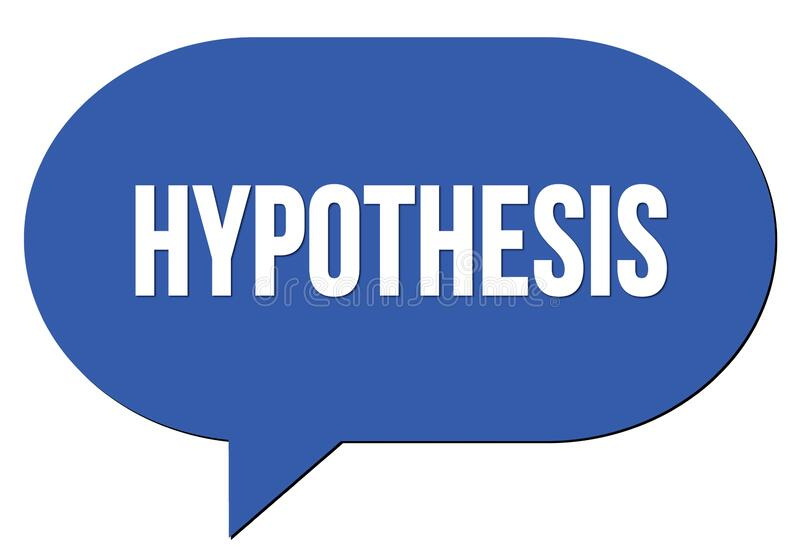

# Hypothesis (1):

* meteorites that fell to Earth were generally larger in mass compared to meteorites that were simply found.

* This hypothesis could be tested by comparing the average mass of meteorites that fell to Earth versus those that were found.

In [ ]:
# Create two sub-dataframes for fallen and found meteorites
fallen_meteorites = mf[mf["fall"] == "Fell"]
found_meteorites = mf[mf["fall"] == "Found"]

# Calculate the average mass for fallen and found meteorites
avg_fallen_mass = fallen_meteorites["mass"].mean()
avg_found_mass = found_meteorites["mass"].mean()

# Print the results
print("Average mass of fallen meteorites: {:.2f} kgs".format(avg_fallen_mass))
print("Average mass of found meteorites: {:.2f} kgs".format(avg_found_mass))

# Plot the results on a bar chart
labels = ["Fallen Meteorites", "Found Meteorites"]
masses = [avg_fallen_mass, avg_found_mass]
plt.bar(labels, masses)
plt.title("Average Mass of Fallen vs. Found Meteorites")
plt.xlabel("Meteorite Type")
plt.ylabel("Average Mass")
plt.show()

# Conclusion(1):
I was correct about the fallen mass is meteorite mass is more than found ones.

# Hypothesis(2):

* As we know china and india has most minerals i am assuming they had most meteorite findings and falls than USA. 

* using base map i took the coordinates of china and india together and loaded the data points in to it in same way to usa

* for more info u can go below to cluster to check the distribution is done.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


# Create a sub-dataframe for meteorites that landed in China
china_meteorites = mf[(mf["reclat"] >= 15.0) & (mf["reclat"] <= 55.0) &
                                  (mf["reclong"] >= 70.0) & (mf["reclong"] <= 140.0)]

# Get latitude and longitude data for the meteorites that landed in China
lats = china_meteorites["reclat"].tolist()
lons = china_meteorites["reclong"].tolist()

# Create a basemap of China
m = Basemap(projection="merc", lat_0=35, lon_0=105, resolution="l", area_thresh=1000.0,
            llcrnrlon=70.0, llcrnrlat=15.0, urcrnrlon=140.0, urcrnrlat=55.0)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color="lightgray", lake_color="white")
m.drawmapboundary(fill_color="white")

# Convert latitudes and longitudes to basemap coordinates
x, y = m(lons, lats)

# Plot meteorite landings on the map
m.plot(x, y, "ro", markersize=5)

# Show the map
plt.title("Meteorite Landings in China")
plt.show()

usa_meteorites = mf[(mf["reclat"] >= 20.0) & (mf["reclat"] <= 50.0) &
                                (mf["reclong"] >= -130.0) & (mf["reclong"] <= -60.0)]

# Get latitude and longitude data for the meteorites that landed in the United States
lats = usa_meteorites["reclat"].tolist()
lons = usa_meteorites["reclong"].tolist()

# Create a basemap of the United States
m = Basemap(projection="merc", lat_0=35, lon_0=-95, resolution="l", area_thresh=1000.0,
            llcrnrlon=-130.0, llcrnrlat=20.0, urcrnrlon=-60.0, urcrnrlat=50.0)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color="lightgray", lake_color="white")
m.drawmapboundary(fill_color="white")

# Convert latitudes and longitudes to basemap coordinates
x, y = m(lons, lats)

# Plot meteorite landings on the map
m.plot(x, y, "ro", markersize=5)

# Show the map
plt.title("Meteorite Landings in the United States")
plt.show()

# Conclusion(2):
My hypothesis was wrong, assuming most minerals were found in India and China, we cannot conclude that meteorites fell more there while comparing the United States with more meteorite finds and falls in both India and China.

# Hypothesis(3):

* the frequency or location of meteorite landings has changed over time. 
* This could be tested by analyzing the year data for each meteorite and looking for trends or patterns over time.

In [ ]:
import matplotlib.pyplot as plt

# extract relevant columns from the dataset
latitudes = mf['reclat']
longitudes = mf['reclong']
years = mf['year']

# plot the data
plt.scatter(years, latitudes, s=100, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.title('Meteorite Landings by Year and Latitude')
plt.show()

plt.scatter(years, longitudes, s=100, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Longitude')
plt.title('Meteorite Landings by Year and Longitude')
plt.show()


# conclusion(3):
* My hypothesis is correct on the frequency or location of meteorite landings has changed over time.


# hypothesis(4):

* That certain types of meteorites are more likely to land in certain regions of the world than others.
* This could be tested by analyzing the recclass data for each meteorite and looking for patterns in the geographical distribution of different meteorite types.


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,10))

# Group data by meteorite class and calculate count of meteorite landings
meteorite_counts_by_class = mf['recclass'].value_counts()

# Create a dictionary to map each meteorite class to a color
class_colors = {'OC': 'red', 'EC': 'blue', 'PA': 'green', 'AA': 'purple', 'UN': 'orange',
              'MIM': 'pink', 'CC': 'gray', 'NMIM': 'yellow', 'MG': 'brown', 'M': 'teal',
              'AOC': 'olive', 'P': 'cyan'}

# Create a scatter plot for each meteorite class
for meteorite_class, color in class_colors.items():
    class_data = mf[mf['recclass'].str.startswith(meteorite_class)]
    plt.scatter(class_data['reclong'], class_data['reclat'], s=10, color=color, alpha=0.5, label=meteorite_class)

# Add a legend and title
plt.legend(title='Meteorite Class')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Meteorite Classes')
plt.show()


In [ ]:
mf['recclass'].unique()

In [ ]:
import matplotlib.pyplot as plt


# Define a list of meteorite classes to loop through
meteorite_classes = ['OC', 'EC', 'PA', 'AA', 'UN', 'MIM', 'CC', 'NMIM', 'MG', 'M', 'AOC', 'P']

# Create a dictionary to map each meteorite class to a color
class_colors = {'L': 'red', 'H': 'blue', 'LL': 'orange', 'E': 'green', 'OC': 'purple', 'EC': 'white', 
                'PA': 'grey', 'AA': 'pink', 'UN': 'brown', 'MIM': 'yellow', 'CC': 'magenta', 
                'NMIM': 'cyan', 'MG': 'lime', 'M': 'teal', 'AOC': 'indigo', 'P': 'violet'}

# Loop through each meteorite class and create a scatter plot for that class
for meteorite_class in meteorite_classes:
    class_data = mf[mf['recclass'].str.startswith(meteorite_class)]
    plt.figure(figsize=(10, 8))
    plt.scatter(class_data['reclong'], class_data['reclat'], s=10, color=class_colors[meteorite_class], alpha=0.5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geographical Distribution of ' + meteorite_class + ' Meteorites')
    plt.show()


# Conclusion(4):
* OC: this type can be found in all places accross the world but more in usa.
* EC: this is one of the rare found type and we can observe a pattern in the lattitude in findings it is almost same and near to Tropical cancer
* PA: this is one of the rare type and no particular distribution pattern its random.
* AA: this type is commmonly found but not in asia part.
* UN: this type can be found in all places accross the world.
* MIM: this type can be found in all places accross the world but more in usa.
* CC: this is one of the rare type and no particular distribution pattern its random.
* NMIM: this type is commmonly found but not in asia part and found more in usa.
* MG: this is one of the rare type and no particular distribution pattern its random.
* M: this type can be found in all places accross the world but more in usa.
* AOC: this type is rare and not found in usa and we can observe some pattern in longitude in findings it is almost same and near to Prime Meridian
* P: this is one of the rare type and no particular distribution pattern its random.



# The meteorite landings have been clustered and their numbers are being shown in the map.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Creati a map 
m = folium.Map(location=[39.8283, -98.5795], zoom_start=3)

# Create a MarkerCluster layer for the map
marker_cluster = MarkerCluster().add_to(m)

# Loop through each meteorite in the dataset and add a marker to the MarkerCluster layer
for i, row in mf.iterrows():
    # Get the latitude and longitude of the meteorite
    lat = row['reclat']
    lon = row['reclong']
    
    # Create a popup for the marker with information about the meteorite
    popup = folium.Popup(str(row['name']) + '<br>' + str(row['year']) + '<br>' + str(row['mass']) + 'kg')
    
    # Create a marker for the meteorite and add it to the MarkerCluster layer
    marker = folium.Marker(location=[lat, lon], popup=popup)
    marker.add_to(marker_cluster)

# Displaying the map
m

# Distribution of south_asia Meteorite Landings with Cluster Markers

Just for information

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Filtering meteorite data for india and china 
south_asia = mf[(mf['reclong'] >= 75) & (mf['reclong'] <= 135) &
                                  (mf['reclat'] >= 15) & (mf['reclat'] <= 55)]



map_south_asia = folium.Map(location=[35.8617, 104.1954], zoom_start=4)

# Creating a marker cluster layer
marker_cluster = MarkerCluster().add_to(map_south_asia)

# Add markers to the marker cluster layer
for index, row in south_asia.iterrows():
    if not pd.isna(row['reclat']) and not pd.isna(row['reclong']):
        folium.Marker(
            location=[row['reclat'], row['reclong']],
            icon=None,
            popup = folium.Popup(str(row['name']) + '<br>' + str(row['year']) + '<br>' + str(row['mass']) + 'kg')
        ).add_to(marker_cluster)

# Displaying the map
map_south_asia


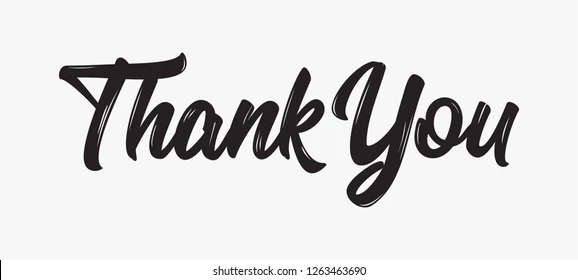